In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [68]:
house=pd.read_csv("C://Users//lenovo//Downloads//calhousing//housing.csv")

In [69]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
 house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [71]:
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [72]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


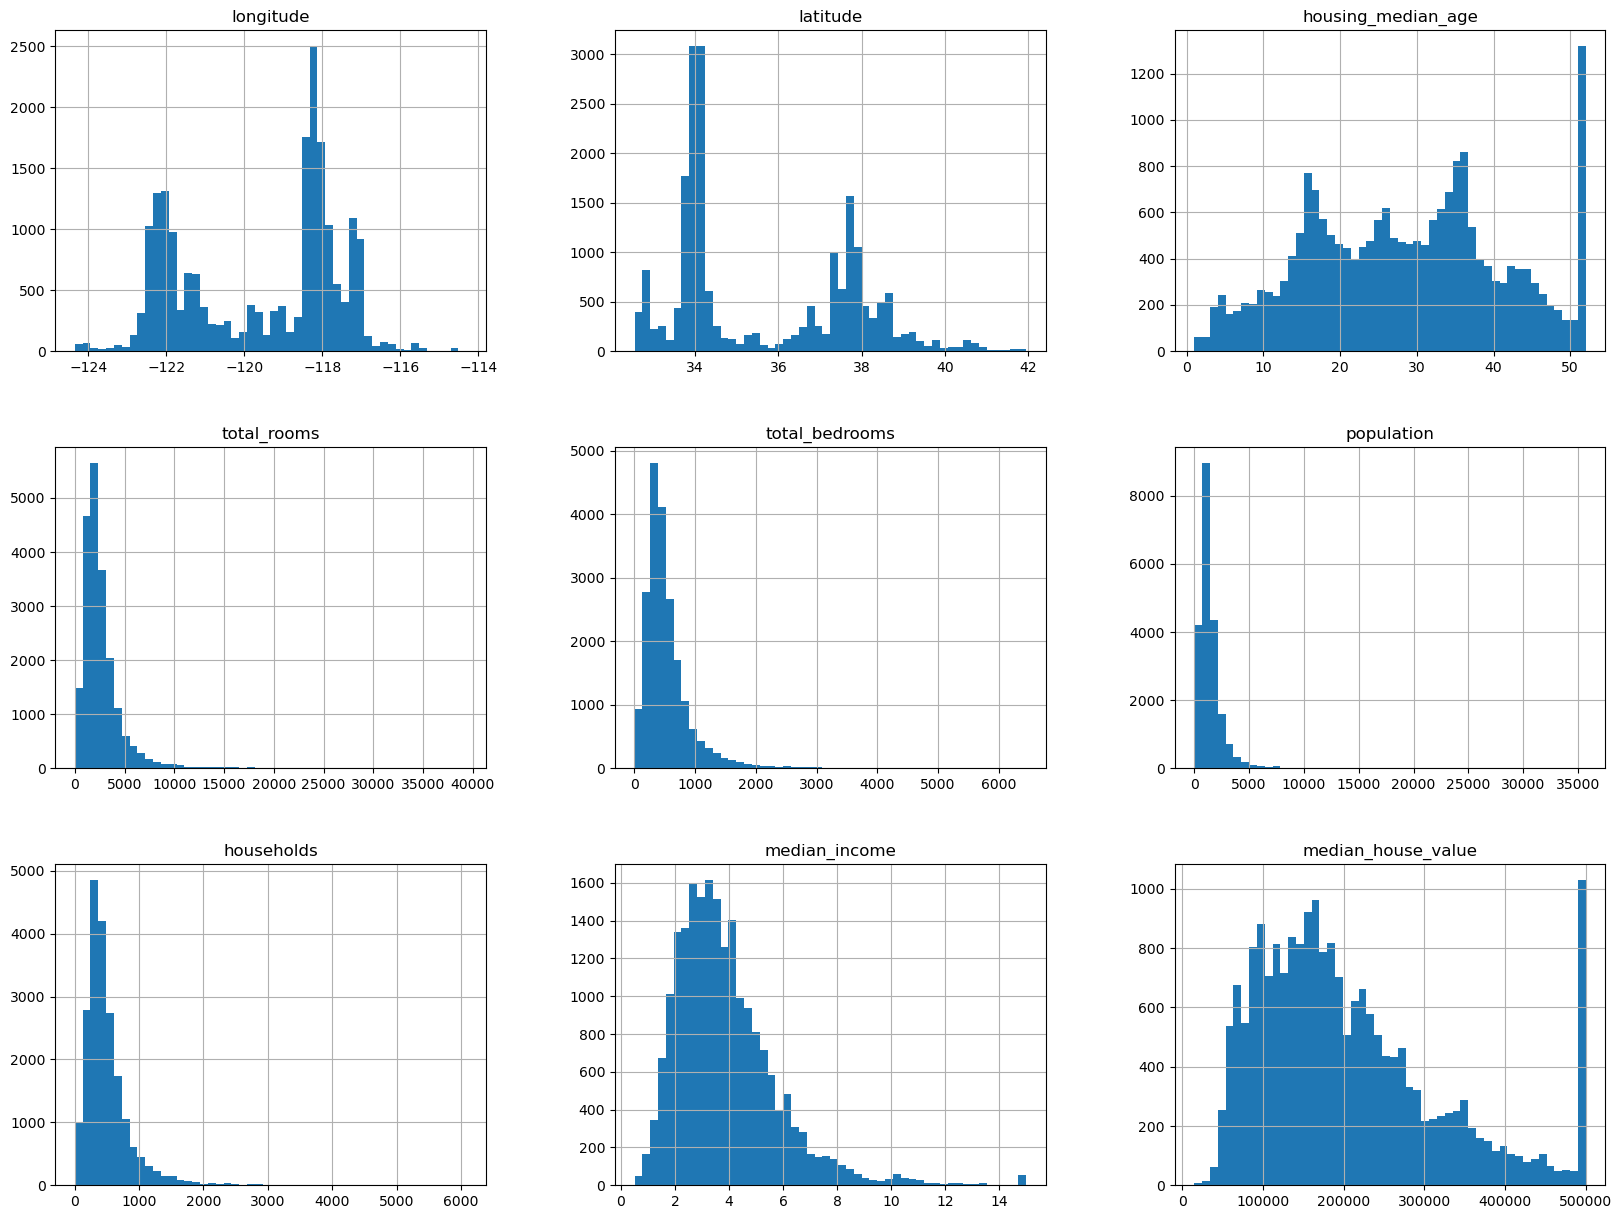

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.25, random_state=42)

In [75]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


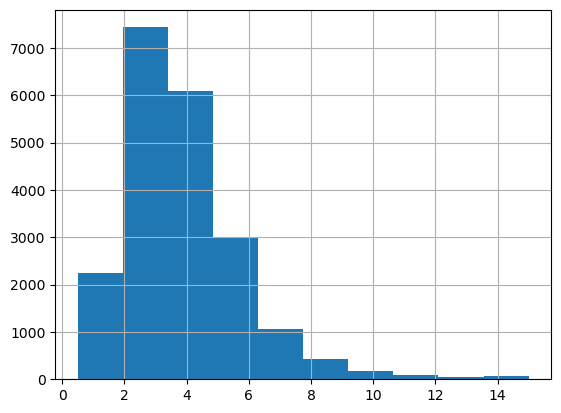

In [76]:
house['median_income'].hist()
plt.show()

In [77]:
import numpy as np
house["income_cat"] = pd.cut(house["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [78]:
house["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

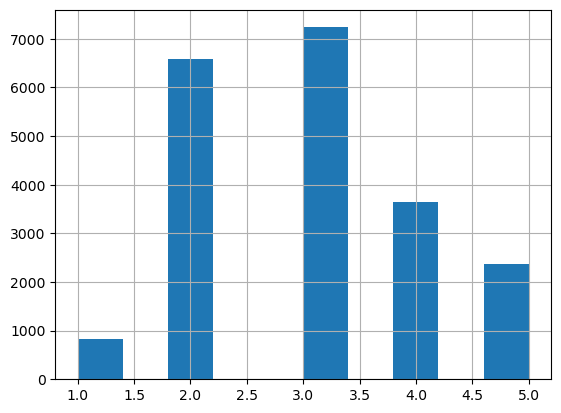

In [79]:
house['income_cat'].hist()
plt.show()

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(house, house["income_cat"]):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [81]:
# lets see if it worked or not
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [82]:
# Now you should remove the income_cat attribute so the data is back to its original state.
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [83]:
house= strat_train_set.copy()

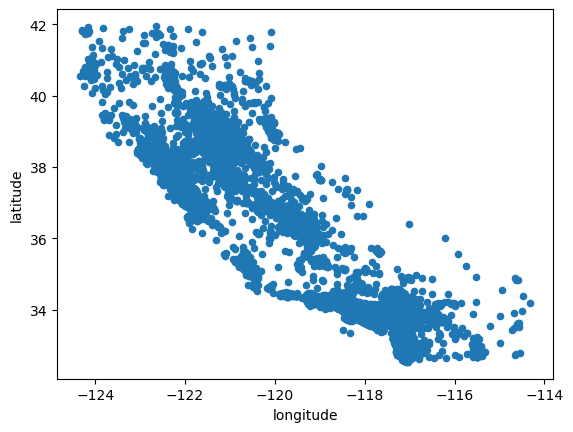

In [84]:
house.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

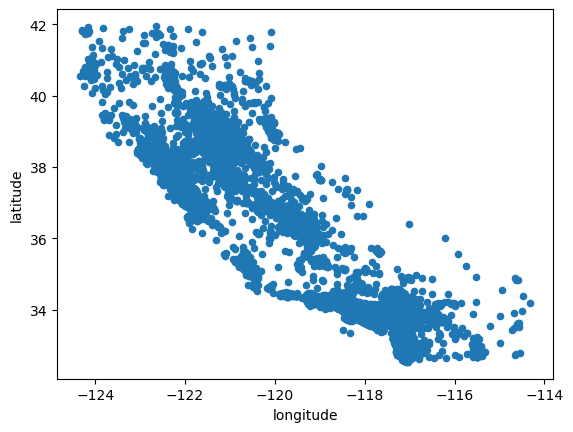

In [85]:
house.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

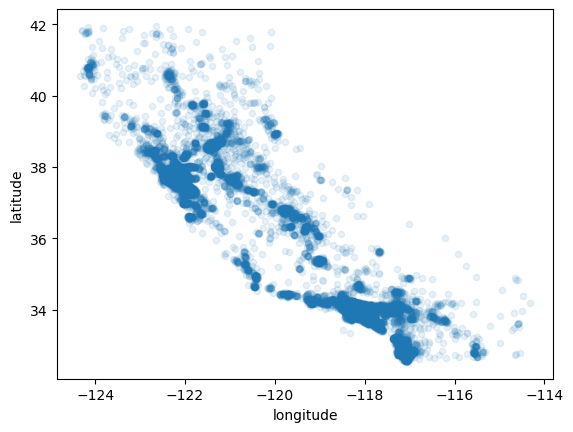

In [86]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

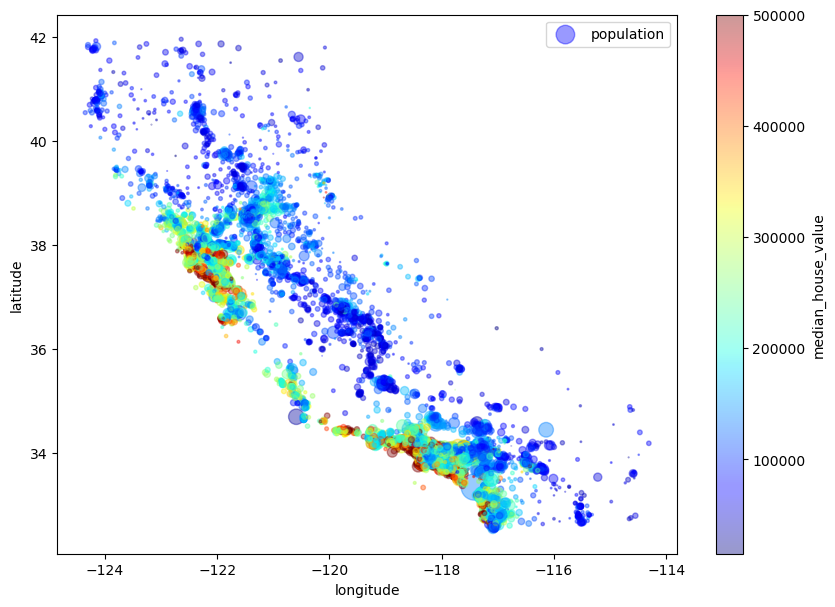

In [87]:
# let's make it clear
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=house["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()
# The radius of each circle represents the district’s population (option s), and the color represents the price (option c).
# We will use a predefined color map (option cmap) called jet, which ranges from blue(low values) to red (high prices).

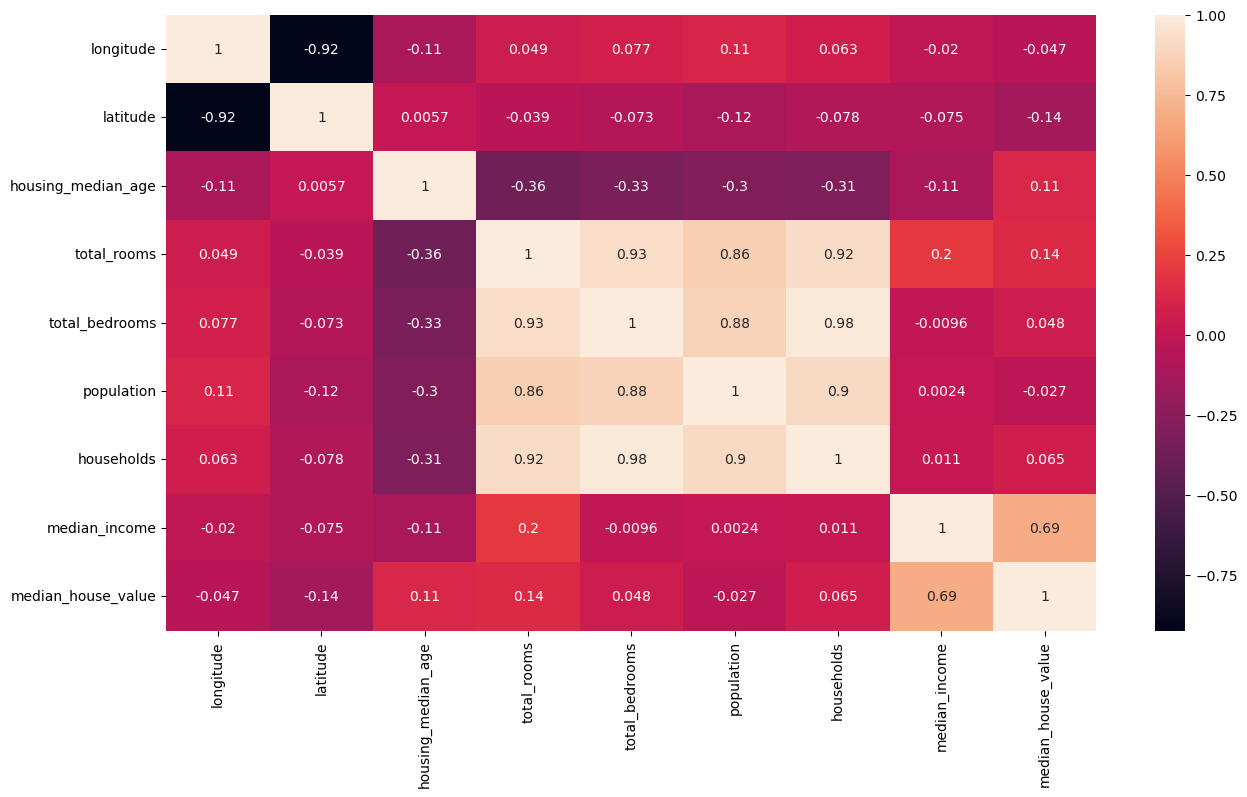

In [88]:
#plt.figure(figsize=(15,8))
#sns.heatmap(house.corr(),annot=True)
plt.figure(figsize=(15, 8))
numeric_columns = house.select_dtypes(include=[np.number]).columns
sns.heatmap(house[numeric_columns].corr(), annot=True)
plt.show()

In [89]:
corr_matrix=house[numeric_columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

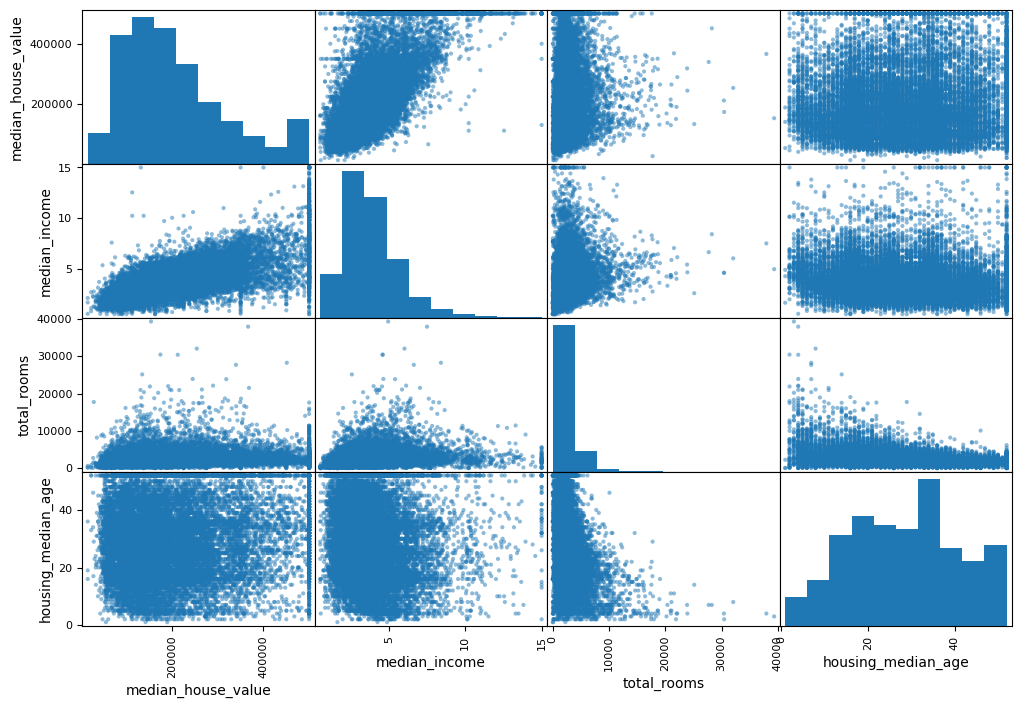

In [90]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(house[attributes], figsize=(12, 8))

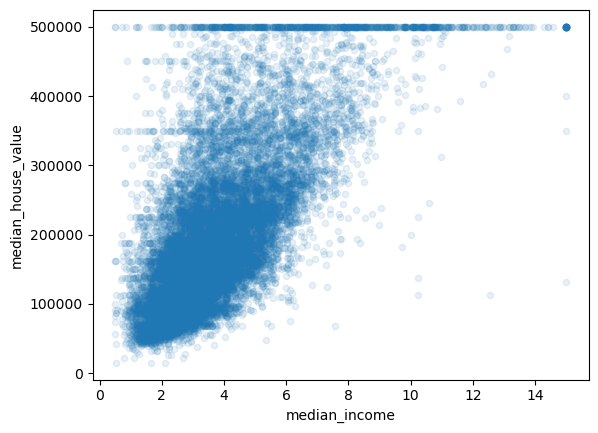

In [91]:
house.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.show()

In [92]:
# EXPERIMENTING WITH ATTRIBUTE COMBINATIONS
# the total number of rooms in a district is not very useful if you don’t know how many households there are.
# What you really want is the number of rooms per household.
house["rooms_per_household"] = house["total_rooms"]/house["households"]
house["bedrooms_per_room"] = house["total_bedrooms"]/house["total_rooms"]
house["population_per_household"]=house["population"]/house["households"]

In [93]:
corr_matrix= house[numeric_columns].corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

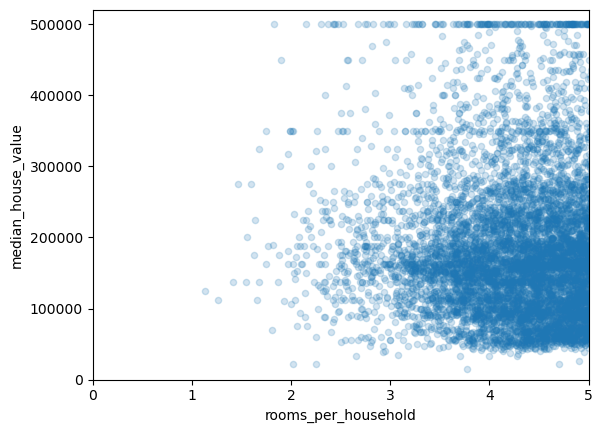

In [94]:
house.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Preparing the data for Machine Learning Algorithm

In [95]:
house = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
house_labels = strat_train_set["median_house_value"].copy()

In [96]:
# DATA Cleaning
# we will fill the the numerical missing values with their medians.
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')

In [97]:
house_num= house.drop('ocean_proximity', axis=1)

In [98]:
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [99]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [100]:
house_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [101]:
X= imputer.transform(house_num)

In [102]:
house_cat = house[["ocean_proximity"]]
house_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [103]:
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method 
# or by setting 'sparse' attribute to False
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
house_cat_1hot = cat_encoder.fit_transform(house_cat)
house_cat_1hot

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [104]:
#CUSTOM TRANSFORMATIONS
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(house.values)

# pipeline for transformation

In [105]:
# TRANSFORMATION PIPELINES
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

house_num_tr = num_pipeline.fit_transform(house_num)

In [106]:
from sklearn.compose import ColumnTransformer
num_attribs = list(house_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

house_prepared = full_pipeline.fit_transform(house)

In [107]:
house_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Select and Train a Model

In [108]:
# Let's train a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train, y_train = train_data.drop(['median_house_value'],axis=1) , train_data['median_house_value']
X_train_s = scaler.fit_transform(house_prepared)
lin_reg = LinearRegression()
lin_reg= LinearRegression()
lin_reg.fit(X_train_s, house_labels)

LinearRegression()

In [109]:
#let's measure RSME(root mean squared error) of our model

from sklearn.metrics import mean_squared_error

house_predictions = lin_reg.predict(house_prepared)
lin_mse = mean_squared_error(house_labels, house_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.016069881106509e+17

In [110]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(house_prepared, house_labels)

DecisionTreeRegressor()

In [111]:
#Let's evatuale on training set
house_predictions = tree_reg.predict(house_prepared)
tree_mse = mean_squared_error(house_labels, house_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

WWWhhhaaattt! no error!!!!! Impossible This is a classic case of model overfitting! Now we will use 'k-fold cross validation' for better evaluation.

In [112]:
# cross validation use the train_test_split function to split the training set into a
# smaller training set and a validation set, then train your models against the smaller training 
#set and evaluate them against the validation set.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, house_prepared, house_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# (Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a 
# cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value),
# which is why the preceding code computes -scores before calculating the square root)

In [113]:
# let's see the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72991.48462172 69524.75379832 69072.56328553 72686.93943667
 69652.84343677 76183.63912252 71940.32629107 71854.0779971
 68115.30950628 71626.51415177]
Mean: 71364.84516477496
Standard deviation: 2244.6511244929284


In [114]:
# let's look for scores for linear regression:
lin_scores = cross_val_score(lin_reg, house_prepared, house_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
# the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818068


In [115]:
# let's try Random Forest Regressor
# (Random Forests work by training many Decision Trees on random subsets of the features,
# then averaging out their predictions)
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(house_prepared, house_labels)

RandomForestRegressor(random_state=42)

In [116]:
housing_predictions = forest_reg.predict(house_prepared)
forest_mse = mean_squared_error(house_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(f"Random Forest RMSE: {forest_rmse}")

Random Forest RMSE: 18650.698705770003


In [117]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, house_prepared, house_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


# Fine-Tune the model using randomized search

In [118]:
# RANDOMIZED SEARCH
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(house_prepared, house_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024D4EA63D50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024D0BAF1E50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [119]:
best_forest =rnd_search.best_estimator_

In [120]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [121]:
rnd_search.best_estimator_.score(house_prepared, house_labels)

0.975560861722938

# pipeline for scaling and training

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("scaler",scaler),
                     ('selector', SelectFromModel(RandomForestRegressor(random_state=42),threshold=0.005)),
                     ("random_forest",best_forest)])


In [123]:
pipeline.fit(house_prepared, house_labels)
pipeline.score(house_prepared, house_labels)

0.9752809553073623